In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/kc_house_data.csv')

In [159]:
# univariate describe 
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [160]:
#  what categories of homes might exist in our dataset? what thresholds or characteristics would we look at to classify them?
# categories based on sqft, size and location> detached, semi detached, condos
# location based> urban, suburb, rural> based on zipcode
# aggregate the grade
# new  vs old 

<Axes: xlabel='date'>

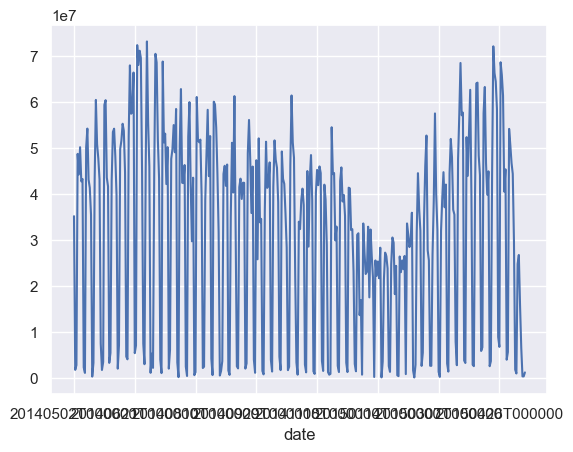

In [161]:
df.groupby('date')['price'].sum().sort_index().plot()

In [162]:
df['date'] = pd.to_datetime(df['date'])

In [163]:
df['price_per_sqft']=df['price']/df['sqft_living']

<Axes: xlabel='date'>

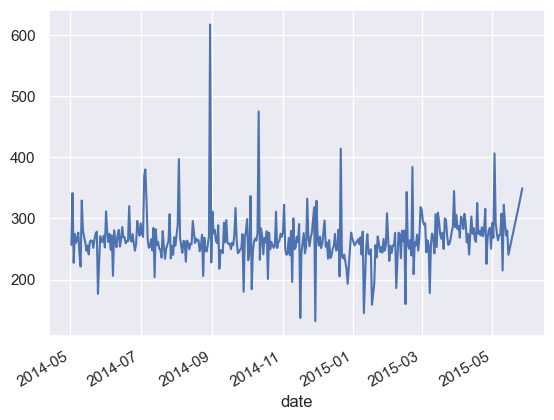

In [164]:
df.groupby('date')['price_per_sqft'].mean().sort_index().plot()

In [165]:
df.groupby('zipcode')['price_per_sqft'].mean()

zipcode
98001    151.387938
98002    151.174091
98003    157.113414
98004    475.435611
98005    314.929231
            ...    
98177    292.918745
98178    189.172528
98188    169.007306
98198    178.428610
98199    376.546345
Name: price_per_sqft, Length: 70, dtype: float64

In [166]:
avg_price_zipcode = df.groupby('zipcode')['price_per_sqft'].mean().to_dict()

In [167]:
avg_price_zipcode

{98001: 151.38793756502668,
 98002: 151.17409095919788,
 98003: 157.11341446884097,
 98004: 475.4356109509919,
 98005: 314.92923109821106,
 98006: 299.0914758506965,
 98007: 290.04901987794375,
 98008: 301.7177311724625,
 98010: 210.0953556830966,
 98011: 225.9872354469397,
 98014: 223.08451167083297,
 98019: 203.0017247765589,
 98022: 181.80643984402292,
 98023: 148.91982870319703,
 98024: 255.23362000685177,
 98027: 251.57228867661547,
 98028: 225.14308528697757,
 98029: 272.07088728906865,
 98030: 155.156220666326,
 98031: 161.04039300615375,
 98032: 154.21951345168029,
 98033: 343.16245412587455,
 98034: 265.95224836863713,
 98038: 173.65623467380615,
 98039: 568.0833501011733,
 98040: 387.29252438969064,
 98042: 164.3484517974173,
 98045: 220.46452757577,
 98052: 280.38632376692135,
 98053: 269.4718271601291,
 98055: 180.40249146722007,
 98056: 215.53612655026214,
 98058: 178.20436170206634,
 98059: 207.24234574313533,
 98065: 210.88604670458065,
 98070: 281.3433626414773,
 98072:

In [168]:
df['zip_price_per_sqft'] = df['zipcode'].map(avg_price_zipcode)

In [169]:
df['compared_to_avg']=df['price_per_sqft'] - df['zip_price_per_sqft']

In [170]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,zip_price_per_sqft,compared_to_avg
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,188.050847,189.172528,-1.121681
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,209.338521,282.471664,-73.133142
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,233.766234,225.143085,8.623148
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,308.163265,337.218034,-29.054769
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,303.571429,265.671342,37.900086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,2009,0,98103,47.6993,-122.346,1530,1509,235.294118,369.841013,-134.546895
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,2014,0,98146,47.5107,-122.362,1830,7200,173.160173,225.491431,-52.331258
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,2009,0,98144,47.5944,-122.299,1020,2007,394.216667,312.241854,81.974813
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,2004,0,98027,47.5345,-122.069,1410,1287,250.000000,251.572289,-1.572289


<Axes: ylabel='compared_to_avg'>

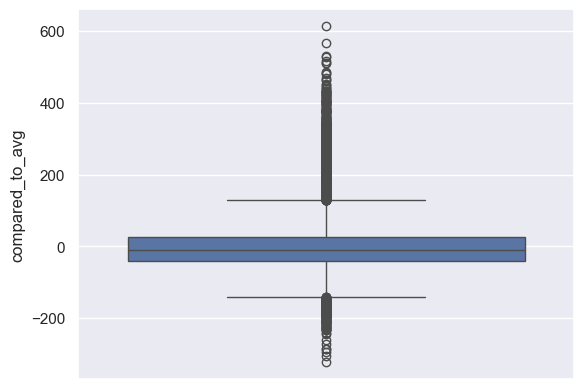

In [171]:
sns.boxplot(df['compared_to_avg'])

In [172]:
def value(x):
    if x>0:
        return "bad investment"
    elif x == 0:
        return 'fair investment'
    else:
        return 'good investment'

In [173]:
df['investment_type']=df['compared_to_avg'].apply(value)

In [174]:
def value_v2(row):
    if row['compared_to_avg'] > 0 and row['grade'] > 10:
        return 'fair investment for a luxury property'
    elif row['compared_to_avg'] >0 and row['grade'] < 10:
        return 'overpaid'
    elif row['compared_to_avg'] <0 and row['grade'] > 10:
        return 'really good deal'
    else:
        return 'average deal'

In [175]:
df['deal_evalution']=df.apply(value_v2,axis=1)

In [176]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,zip_price_per_sqft,compared_to_avg,investment_type,deal_evalution
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,98178,47.5112,-122.257,1340,5650,188.050847,189.172528,-1.121681,good investment,average deal
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,98125,47.7210,-122.319,1690,7639,209.338521,282.471664,-73.133142,good investment,average deal
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,98028,47.7379,-122.233,2720,8062,233.766234,225.143085,8.623148,bad investment,overpaid
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,98136,47.5208,-122.393,1360,5000,308.163265,337.218034,-29.054769,good investment,average deal
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,98074,47.6168,-122.045,1800,7503,303.571429,265.671342,37.900086,bad investment,overpaid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,98103,47.6993,-122.346,1530,1509,235.294118,369.841013,-134.546895,good investment,average deal
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,98146,47.5107,-122.362,1830,7200,173.160173,225.491431,-52.331258,good investment,average deal
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,98144,47.5944,-122.299,1020,2007,394.216667,312.241854,81.974813,bad investment,overpaid
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,98027,47.5345,-122.069,1410,1287,250.000000,251.572289,-1.572289,good investment,average deal


In [177]:
#1. Using the new features we created, what insights can you find in the data? For example, what type of homes tend to be over/underpriced?
#2. How could you adjust the price_per_sqft calculation to take into account recency of sale? Try building a function -- then repeat your analysis. Any changes?

In [180]:
def rolling_avg(group):
    group = group.sort_values('date')
    rolling_avg = group.set_index('date')['price_per_sqft'].rolling('90D').mean().shift()
    group['rolling_avg'] = rolling_avg.values
    return group

In [181]:
df = df.groupby('zipcode').apply(rolling_avg).reset_index(drop=True)

/var/folders/9_/nngl5mtd5fj36m6d20z7p0pr0000gn/T/ipykernel_9771/2836224715.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('zipcode').apply(rolling_avg).reset_index(drop=True)


In [182]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,price_per_sqft,zip_price_per_sqft,compared_to_avg,investment_type,deal_evalution,rolling_avg
0,3328500250,2014-05-02,285000.0,4,2.50,2200,9397,2.0,0,0,...,47.3406,-122.269,2310,9176,129.545455,151.387938,-21.842483,good investment,average deal,NaN
1,6143600580,2014-05-05,184000.0,3,1.75,1490,10125,1.0,0,0,...,47.3075,-122.284,2488,4981,123.489933,151.387938,-27.898005,good investment,average deal,129.545455
2,3329520410,2014-05-05,245000.0,3,1.75,1920,9306,1.0,0,0,...,47.3319,-122.267,1860,8458,127.604167,151.387938,-23.783771,good investment,average deal,126.517694
3,4012800010,2014-05-06,360000.0,4,2.00,2680,18768,1.0,0,0,...,47.3182,-122.279,1230,15750,134.328358,151.387938,-17.059579,good investment,average deal,126.879851
4,7696630080,2014-05-06,197000.0,3,1.75,1690,7735,1.0,0,0,...,47.3324,-122.280,1580,7503,116.568047,151.387938,-34.819890,good investment,average deal,128.741978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,5037300130,2015-05-04,672500.0,3,1.75,1580,5750,1.0,0,2,...,47.6339,-122.392,2480,5750,425.632911,376.546345,49.086566,bad investment,overpaid,388.794780
21609,1370800830,2015-05-05,1220000.0,3,3.25,3960,6132,2.0,0,3,...,47.6396,-122.409,2730,5221,308.080808,376.546345,-68.465537,good investment,average deal,389.218207
21610,6821101895,2015-05-07,680000.0,2,1.00,2140,6000,1.0,0,0,...,47.6510,-122.399,1560,6000,317.757009,376.546345,-58.789336,good investment,average deal,388.222161
21611,6822100750,2015-05-08,700000.0,3,1.75,1500,6000,1.0,0,0,...,47.6474,-122.402,1700,6000,466.666667,376.546345,90.120322,bad investment,overpaid,387.421420


In [183]:
df[df['zipcode']==98001].sort_values('date')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,price_per_sqft,zip_price_per_sqft,compared_to_avg,investment_type,deal_evalution,rolling_avg
0,3328500250,2014-05-02,285000.0,4,2.50,2200,9397,2.0,0,0,...,47.3406,-122.269,2310,9176,129.545455,151.387938,-21.842483,good investment,average deal,NaN
1,6143600580,2014-05-05,184000.0,3,1.75,1490,10125,1.0,0,0,...,47.3075,-122.284,2488,4981,123.489933,151.387938,-27.898005,good investment,average deal,129.545455
2,3329520410,2014-05-05,245000.0,3,1.75,1920,9306,1.0,0,0,...,47.3319,-122.267,1860,8458,127.604167,151.387938,-23.783771,good investment,average deal,126.517694
3,4012800010,2014-05-06,360000.0,4,2.00,2680,18768,1.0,0,0,...,47.3182,-122.279,1230,15750,134.328358,151.387938,-17.059579,good investment,average deal,126.879851
4,7696630080,2014-05-06,197000.0,3,1.75,1690,7735,1.0,0,0,...,47.3324,-122.280,1580,7503,116.568047,151.387938,-34.819890,good investment,average deal,128.741978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,302000375,2015-05-06,250000.0,3,2.00,1050,18304,1.0,0,0,...,47.3206,-122.269,1690,15675,238.095238,151.387938,86.707301,bad investment,overpaid,159.240375
357,2895550330,2015-05-06,290000.0,3,2.50,1600,6848,2.0,0,0,...,47.3303,-122.271,1700,7210,181.250000,151.387938,29.862062,bad investment,overpaid,157.932271
359,2895550050,2015-05-07,280000.0,3,2.50,1550,4486,2.0,0,0,...,47.3299,-122.269,1700,4487,180.645161,151.387938,29.257224,bad investment,overpaid,160.136453
360,3751600409,2015-05-08,510000.0,4,2.50,4073,17334,2.0,0,0,...,47.2949,-122.270,1780,9625,125.214829,151.387938,-26.173108,good investment,average deal,160.366888


In [185]:
sns.boxplot(df['above/below'])

KeyError: 'above/below'

In [187]:
df['above/below'] = dfI'price_per_sqft'1 - df l'rolling_avg.

SyntaxError: invalid syntax (3249560357.py, line 1)